In [1]:
import os
import pandas as pd
import numpy as np
import deeptime as dt
import matplotlib.pyplot as plt

In [2]:
%cd {os.environ['HOME']}/Sync/work_in_progress/sh2-som

/home/toni/Sync/work_in_progress/sh2-som


In [3]:
d = pd.read_table("SOM.neuron.classification.dat")

In [4]:
d["RFrame"] = d.groupby("Replica").cumcount().add(1)

In [5]:
d

,Frame,Replica,Neuron.classif,RFrame
0,1.0,1,1,1
1,2.0,1,1,2
2,3.0,1,1,3
3,4.0,1,1,4
4,5.0,1,1,5
...,...,...,...,...
607498,607499.0,800,225,790
607499,607500.0,800,225,791
607500,607501.0,800,225,792
607501,607502.0,800,225,793


In [6]:
# -1 to convert from 1-based indices to deeptime's 0-based ones
dgroups = d.groupby("Replica")
trajs = [dgroups.get_group(x)["Neuron.classif"].add(-1).to_numpy() for x in dgroups.groups]


In [7]:
models = []
lagtimes = np.arange(1, 400, 40)
for lag in lagtimes:
    tmp=dt.markov.TransitionCountEstimator(lagtime=lag, count_mode="sliding").fit_fetch(trajs)
    models.append(dt.markov.msm.MaximumLikelihoodMSM().fit_fetch(tmp))

<Axes: >

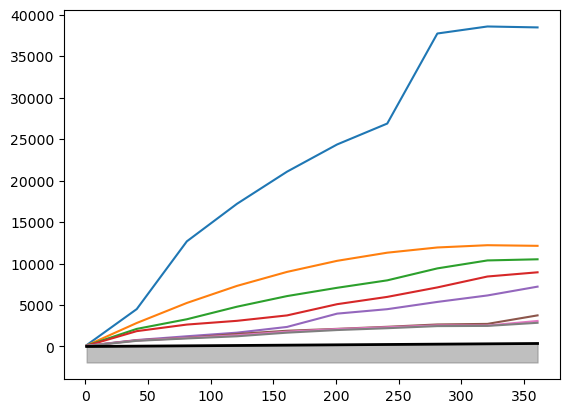

In [8]:
#fig, ax = plt.subplots(1, 1)
its_data = dt.util.validation.implied_timescales(models)
dt.plots.plot_implied_timescales(its_data, n_its=8)

In [16]:
bmodels = []
lagtimes = [1, 25, 50, 100, 150, 200, 300]
for lag in lagtimes:
    tmp=dt.markov.TransitionCountEstimator(lagtime=lag, count_mode="effective").fit_fetch(trajs)
    bmodels.append(dt.markov.msm.BayesianMSM(n_samples=20, maxiter=100000).fit_fetch(tmp))

(0.0, 40000.0)

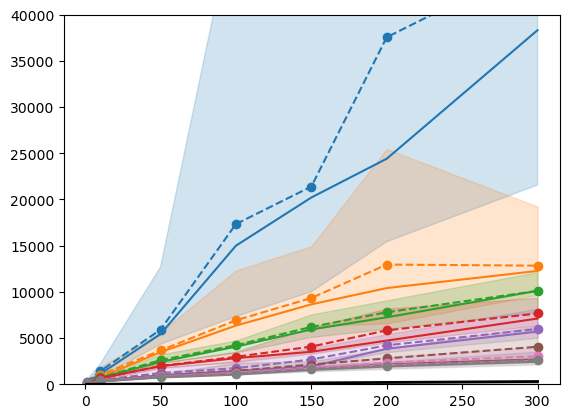

In [17]:
b_its_data = dt.util.validation.implied_timescales(bmodels)
dt.plots.plot_implied_timescales(b_its_data, n_its=8)
plt.ylim(0,40000)

# PCCA

In [19]:
models[2].lagtime

81

In [20]:
pcca = models[2].pcca(n_metastable_sets=10)

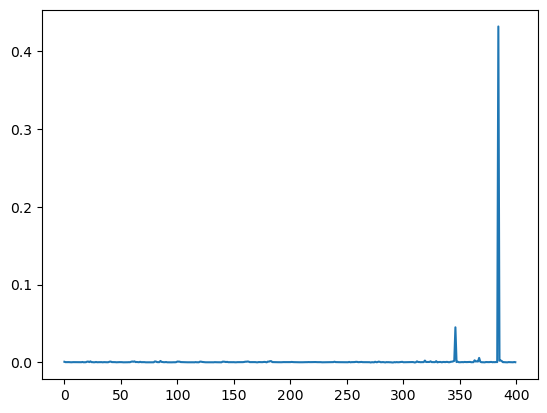

In [29]:
plt.plot(pcca.memberships[:,2])

In [38]:
from hexalattice.hexalattice import *
hex_centers, _ = create_hex_grid(nx=20,
                                 ny=20,
                                 do_plot=False)
                                 


In [51]:
plt.hexbin(hex_centers[:,0], hex_centers[:,1])


<IPython.core.display.Javascript object>

## IDEAS

* Remove the absorbing state?
* PCCA?
 

In [49]:
matplotlib.use("nbAgg")

In [48]:
?matplotlib.use

Signature: matplotlib.use(backend, *, force=True)
Docstring:
Select the backend used for rendering and GUI integration.

If pyplot is already imported, `~matplotlib.pyplot.switch_backend` is used
and if the new backend is different than the current backend, all Figures
will be closed.

Parameters
----------
backend : str
    The backend to switch to.  This can either be one of the standard
    backend names, which are case-insensitive:

    - interactive backends:
      GTK3Agg, GTK3Cairo, GTK4Agg, GTK4Cairo, MacOSX, nbAgg, QtAgg,
      QtCairo, TkAgg, TkCairo, WebAgg, WX, WXAgg, WXCairo, Qt5Agg, Qt5Cairo

    - non-interactive backends:
      agg, cairo, pdf, pgf, ps, svg, template

    or a string of the form: ``module://my.module.name``.

    Switching to an interactive backend is not possible if an unrelated
    event loop has already been started (e.g., switching to GTK3Agg if a
    TkAgg window has already been opened).  Switching to a non-interactive
    backend is always possib